In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

In [2]:
ROOT_DIR = "../../"

In [3]:
with open(ROOT_DIR + "config/config-scraping.json") as f:
    cfg = json.load(f)

In [4]:
game = cfg["selected-game"]
mdata_df = pd.read_csv(ROOT_DIR + cfg["test-metadata-csv-read-path"].format(game, game))
img_feats_df = pd.read_csv(ROOT_DIR + cfg["test-videos-dir"].format(game) + "basic_stats.csv")
face_df = pd.read_csv(ROOT_DIR + cfg["test-videos-dir"].format(game) + "facialFeatures.csv")
if "Unnamed: 0" in face_df:
    face_df = face_df.drop("Unnamed: 0", axis=1)

df = mdata_df.merge(face_df, on="videoId")
df = df.merge(img_feats_df, on="videoId")

## Position vs Metrics

In [5]:
basic_analy_cols = ["commentCount", "dislikeCount", "favoriteCount",
                    "likeCount", "viewCount", "z_comments", 
                    "z_dislikes", "z_likes", "z_views"]

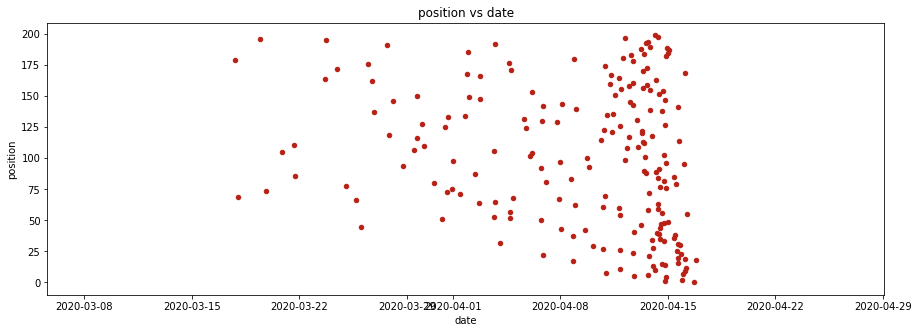

In [59]:
temp_df = df.copy()
temp_df["date"] = temp_df.date.apply(pd.to_datetime)

temp_df.plot(kind="scatter", y="position", x="date", title="position vs date", figsize=(15,5), color="#b82116")

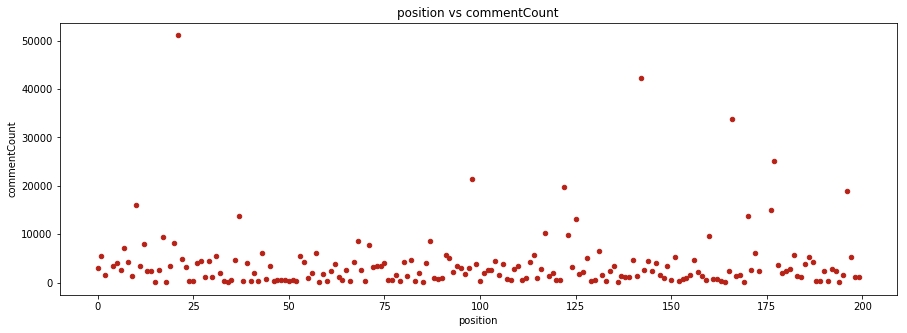

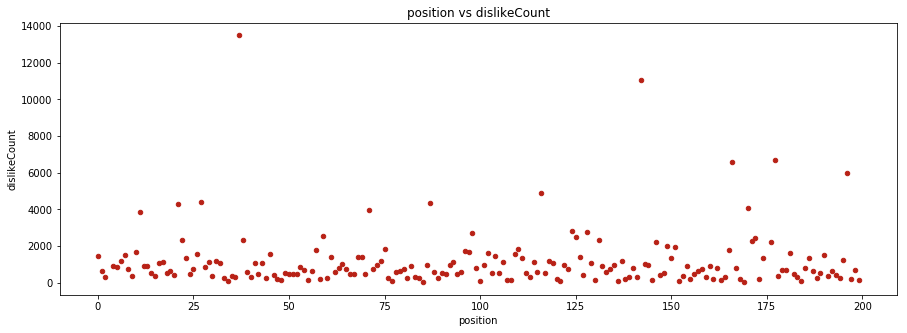

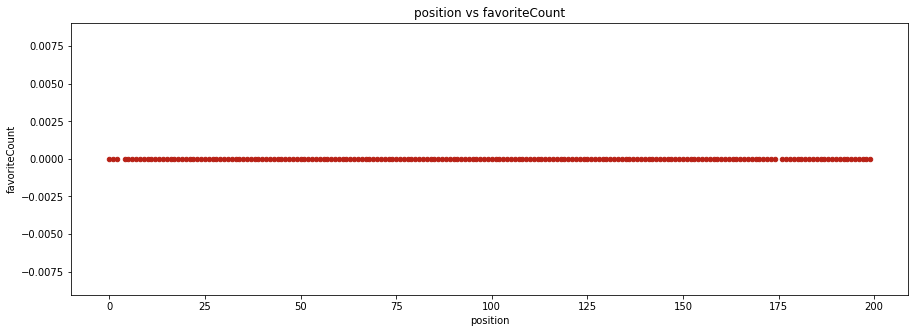

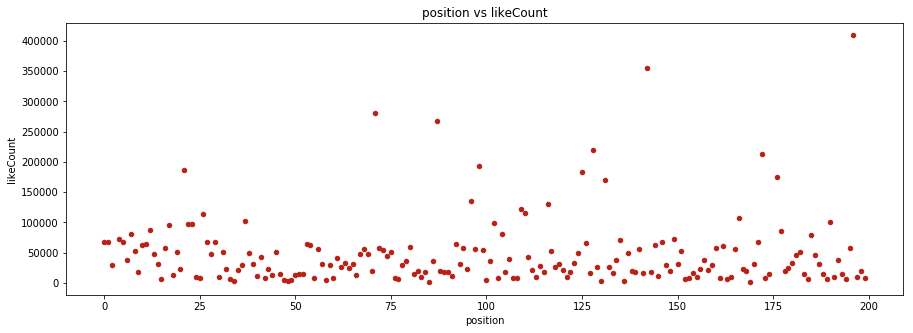

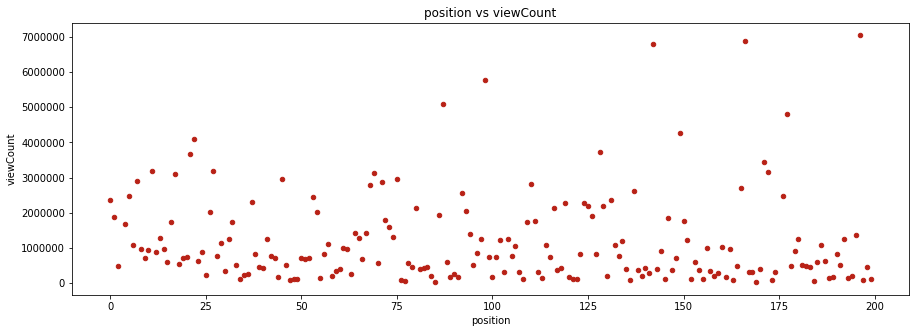

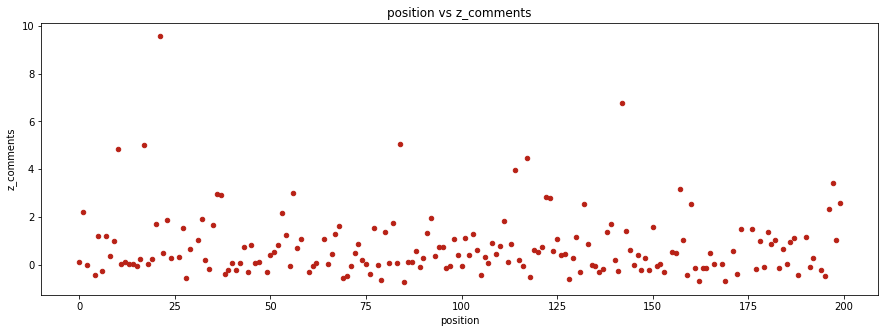

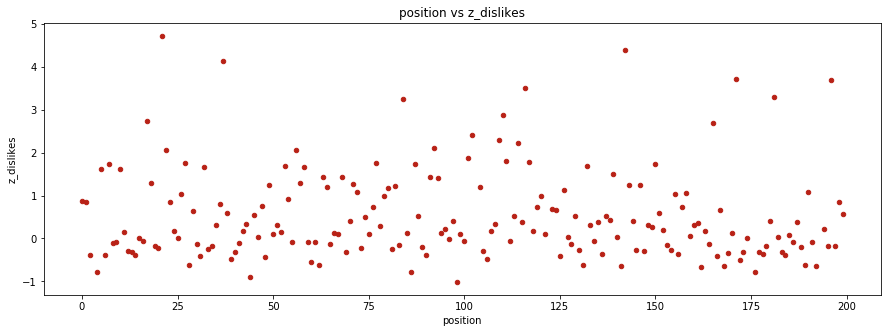

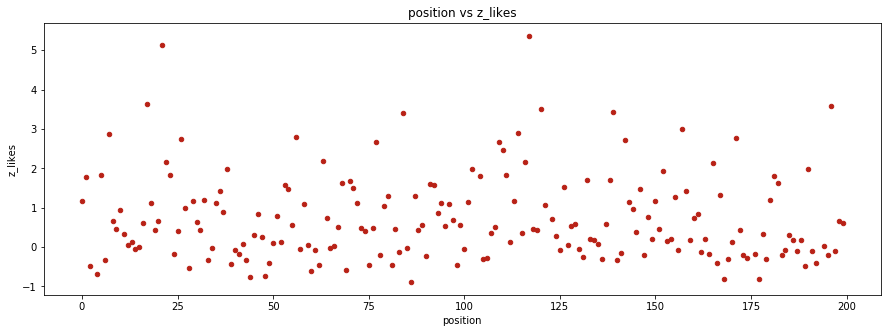

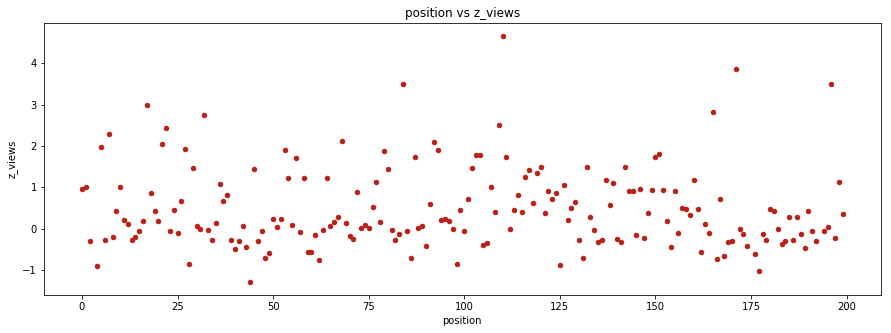

In [6]:
for key in basic_analy_cols:
    df.plot(kind="scatter", x="position", y=key, title="position vs " + key, figsize=(15,5), color="#b82116")

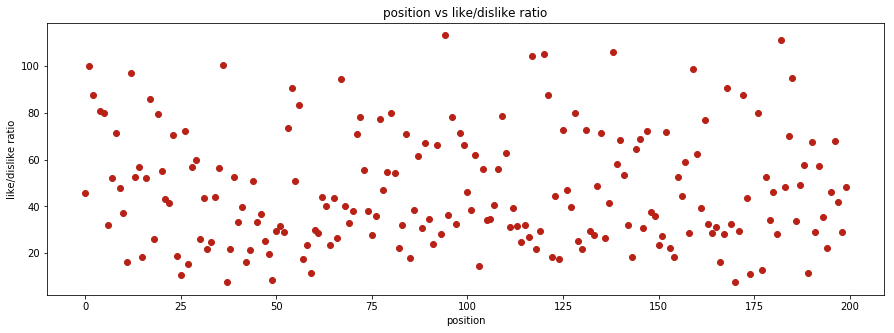

In [7]:
figure(figsize=(15, 5))
plt.scatter(x=df.position, y=df.likeCount / df.dislikeCount, color="#b82116")
plt.xlabel("position")
plt.ylabel("like/dislike ratio")
plt.title("position vs like/dislike ratio")
plt.show()

## Metrics vs Inner-Channel Z-Scores

In [8]:
z_stats = ["comment", "dislike", "like", "view"]

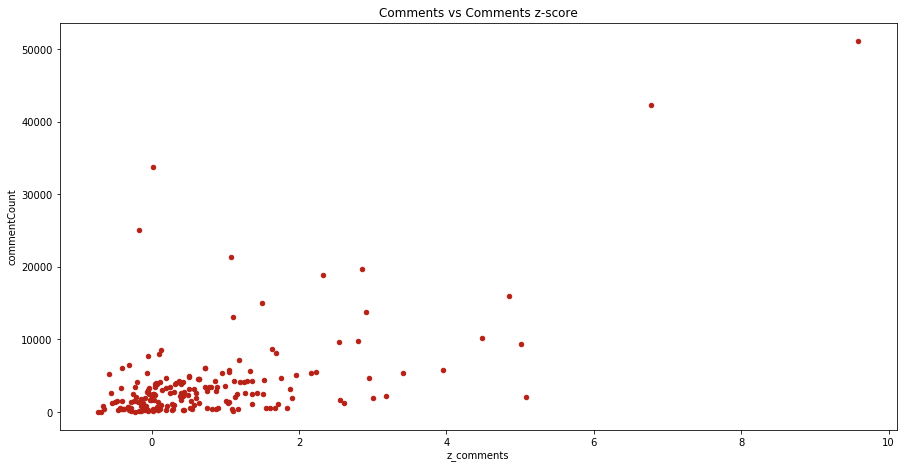

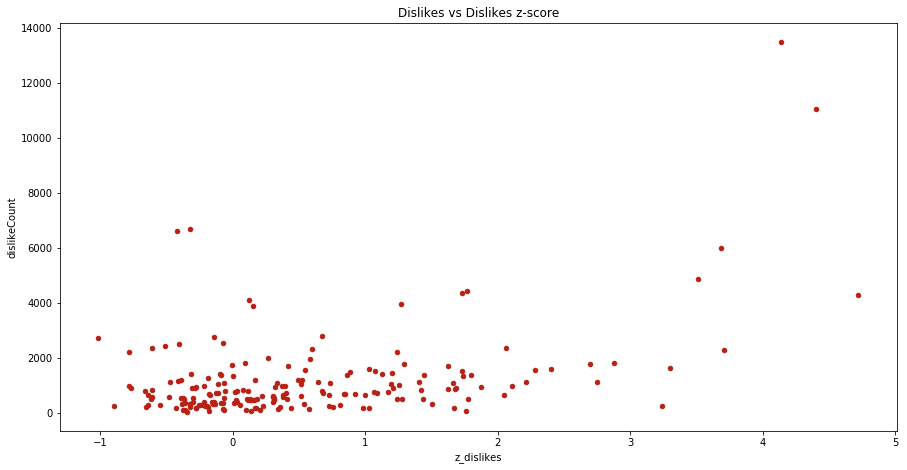

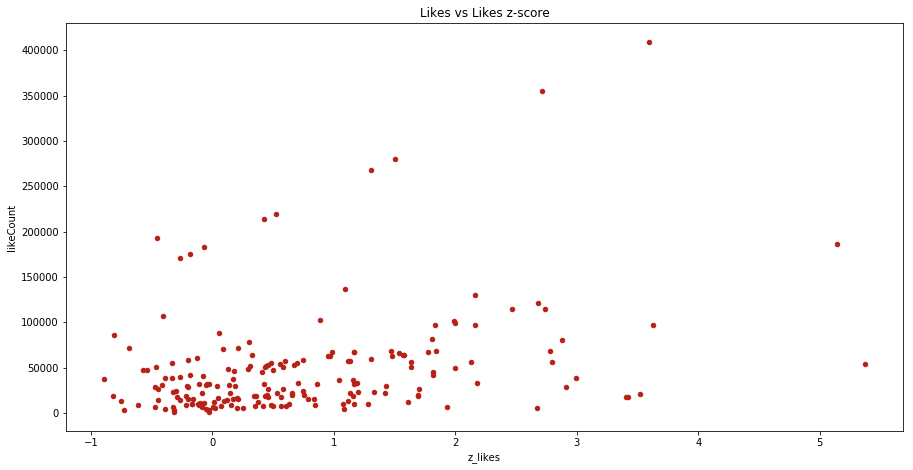

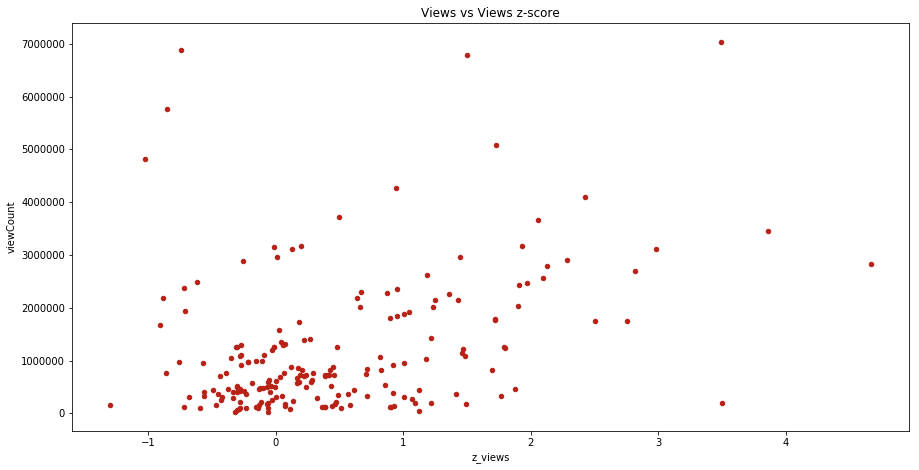

In [9]:
for stat in z_stats:
    df.plot(y="{}Count".format(stat),
            x="z_{}s".format(stat),
            title=stat.capitalize() + "s vs " + stat.capitalize() + "s z-score",
            figsize=(15, 7.5),
            kind="scatter",
            color="#b82116")

## Facial Features

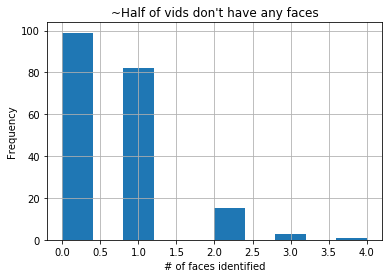

In [10]:
ax = df.numFaces.plot(kind="hist",
                      title="~Half of vids don't have any faces")
ax.set_xlabel("# of faces identified")
ax.grid(True)

In [11]:
df.shape

(200, 37)

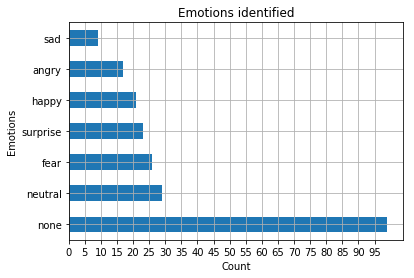

In [12]:
ax = pd.Series(df.emotions.fillna("['none']").apply(eval).sum()).value_counts().plot(kind="barh",
                                                                                     title="Emotions identified",
                                                                                     xticks=range(0, int(df.shape[0]/2), 5))
ax.set_xlabel("Count")
ax.set_ylabel("Emotions")
ax.grid(True)

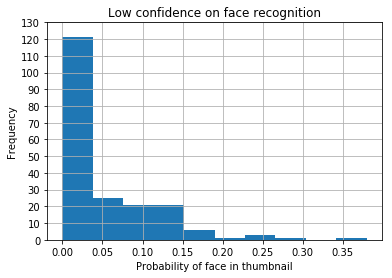

In [13]:
ax = df.face_percent.apply(eval).apply(sum).plot(kind="hist",
                                                 title="Low confidence on face recognition",
                                                 yticks=range(0, int(df.shape[0]/1.5), 10))
ax.set_xlabel("Probability of face in thumbnail")
ax.grid(True)

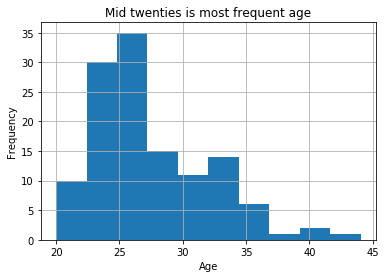

In [14]:
ax = pd.Series(df.age.dropna().apply(eval).sum()).plot(kind="hist",
                                                       title="Mid twenties is most frequent age")
ax.set_xlabel("Age")
ax.grid(True)

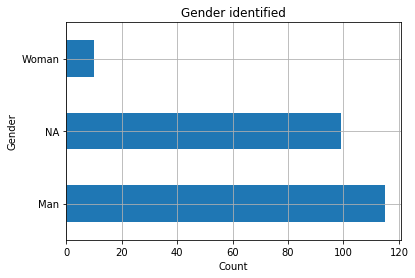

In [15]:
ax = pd.Series(df.gender.fillna("['NA']").apply(eval).sum()).value_counts().plot(kind="barh",
                                                                                   title="Gender identified")
ax.set_xlabel("Count")
ax.set_ylabel("Gender")
ax.grid(True)

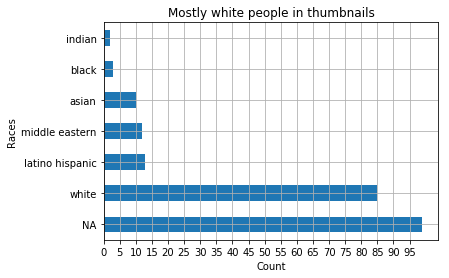

In [16]:
ax = pd.Series(df.race.fillna("['NA']").apply(eval).sum()).value_counts().plot(kind="barh",
                                                                               title="Mostly white people in thumbnails",
                                                                               xticks=range(0, int(df.shape[0]/2), 5))
ax.set_xlabel("Count")
ax.set_ylabel("Races")
ax.grid(True)

```How am I to be interpreting face locations data?```

In [17]:
df.face_locations.apply(eval).sum()

[(30, 87, 87, 30),
 (77, 168, 117, 129),
 (17, 288, 57, 249),
 (21, 172, 61, 133),
 (28, 168, 76, 121),
 (53, 63, 100, 15),
 (30, 193, 112, 111),
 (33, 105, 101, 37),
 (85, 88, 125, 49),
 (30, 76, 87, 19),
 (30, 110, 112, 28),
 (38, 201, 120, 119),
 (38, 110, 120, 28),
 (33, 243, 101, 175),
 (40, 133, 108, 65),
 (59, 100, 158, 2),
 (24, 93, 81, 36),
 (24, 70, 81, 13),
 (38, 301, 120, 219),
 (30, 110, 128, 12),
 (33, 72, 73, 33),
 (42, 214, 99, 157),
 (38, 320, 120, 244),
 (47, 260, 104, 203),
 (21, 248, 61, 209),
 (33, 91, 101, 23),
 (101, 77, 148, 30),
 (19, 231, 66, 183),
 (14, 178, 61, 131),
 (43, 82, 90, 35),
 (30, 110, 112, 28),
 (21, 120, 61, 81),
 (40, 84, 108, 16),
 (53, 272, 110, 215),
 (17, 260, 57, 221),
 (39, 104, 157, 0),
 (30, 309, 128, 211),
 (26, 98, 94, 30),
 (30, 93, 112, 11),
 (40, 84, 108, 16),
 (65, 184, 105, 145),
 (24, 208, 81, 151),
 (21, 76, 61, 37),
 (17, 244, 57, 205),
 (38, 110, 120, 28),
 (40, 319, 138, 221),
 (40, 80, 138, 0),
 (54, 278, 122, 210),
 (33, 1

## Image features

In [19]:
stat_cols = img_feats_df.keys().drop(["videoId", "thumbnailFilename", "size"])

In [46]:
test_df = df.copy()
test_df["position"] = test_df["position"].apply(lambda val:-(val//20 * 20))
test_df = test_df[["position"] + list(stat_cols)]
fig = px.parallel_coordinates(test_df,
                              color="position",
                              width=1500,
                              height=500,
                              color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

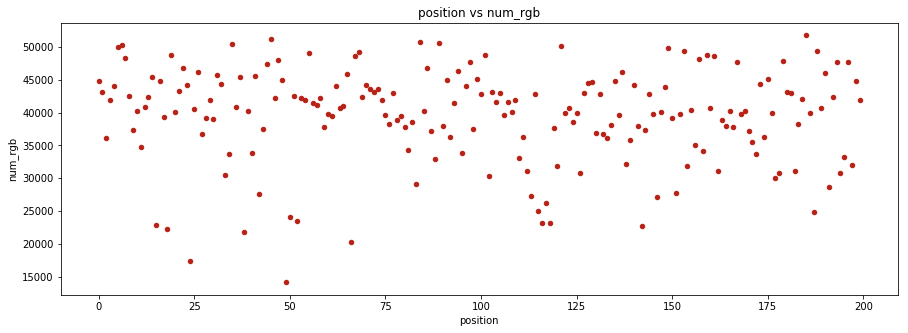

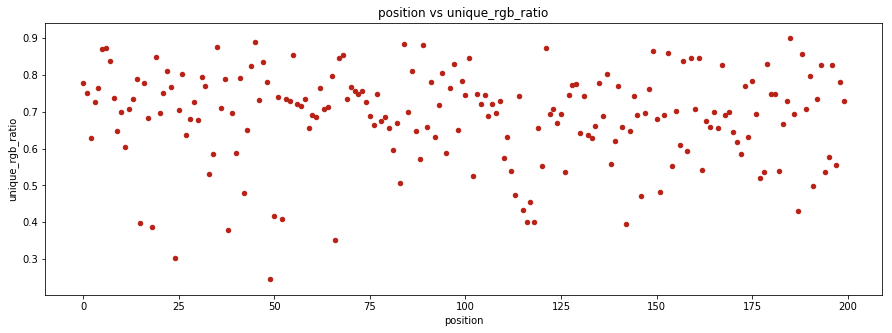

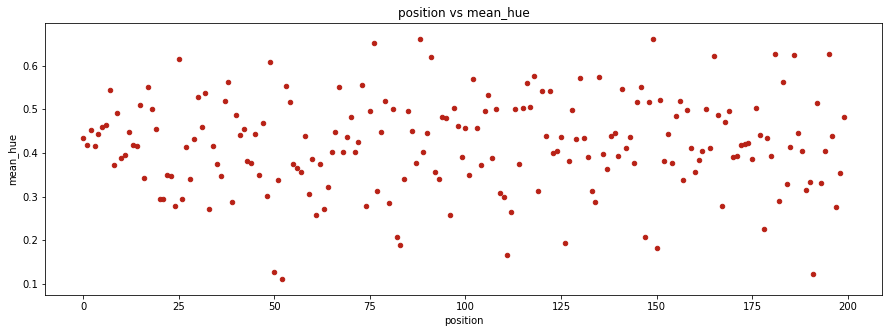

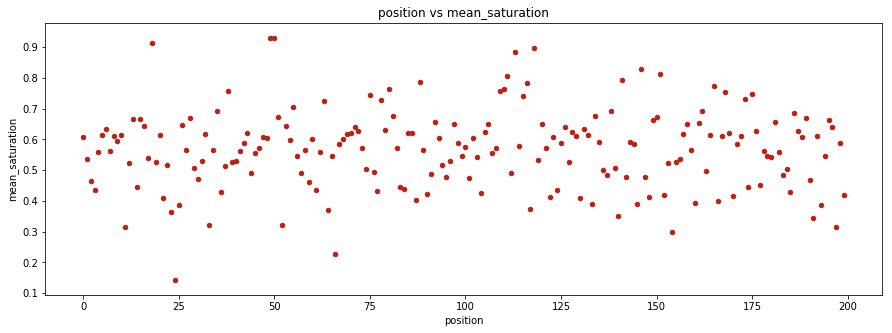

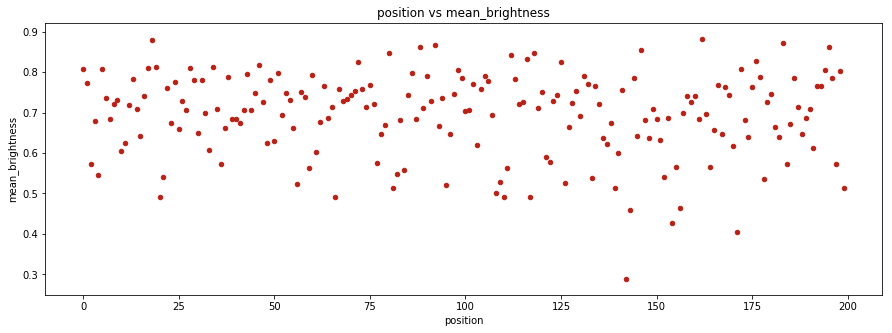

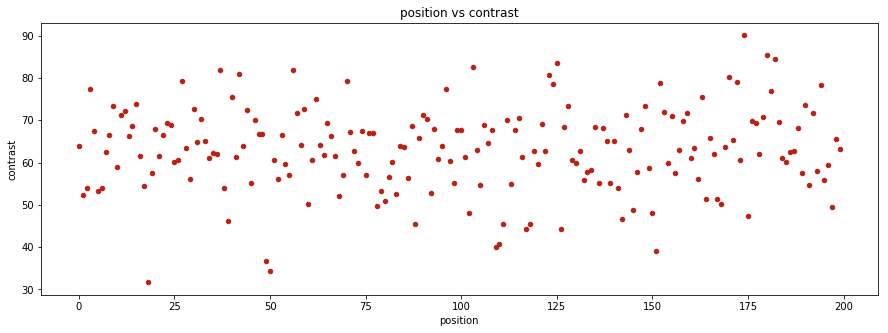

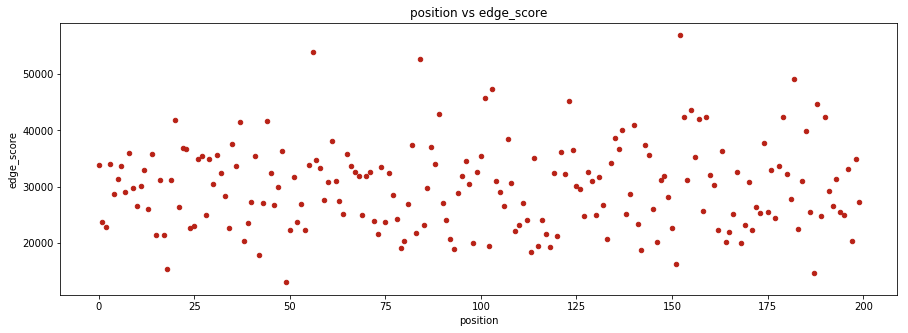

In [20]:
for col in stat_cols:
    df.plot(kind="scatter",
            x="position",
            y=col,
            title="position vs " + col,
            figsize=(15,5),
            color="#b82116")

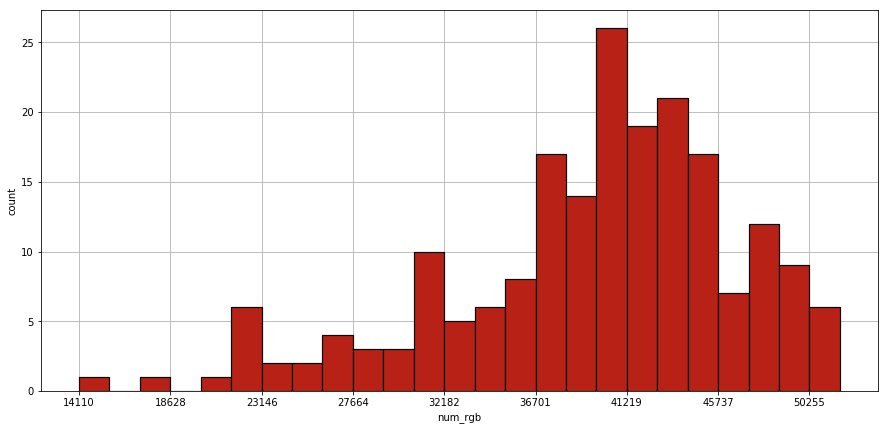

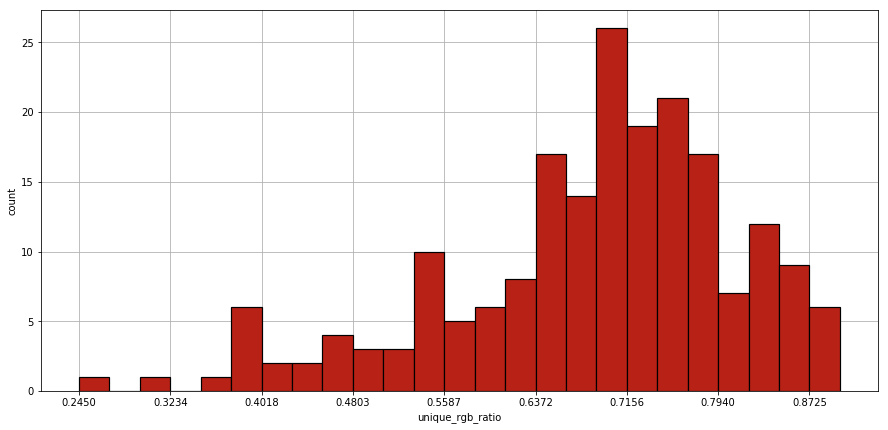

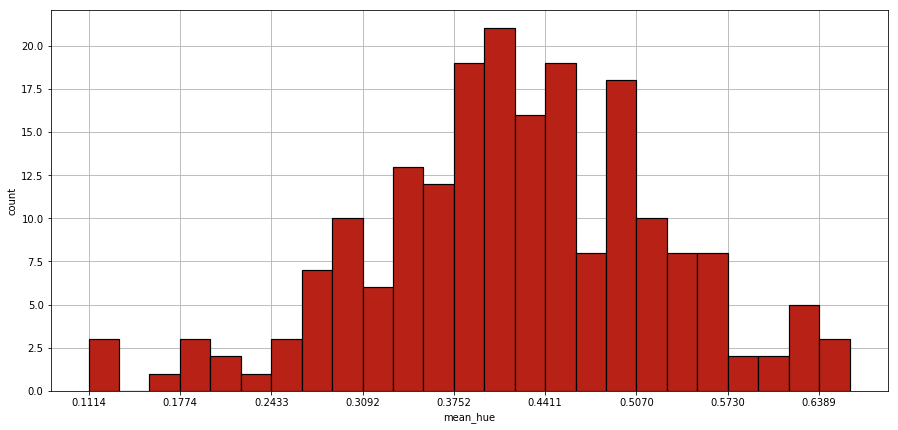

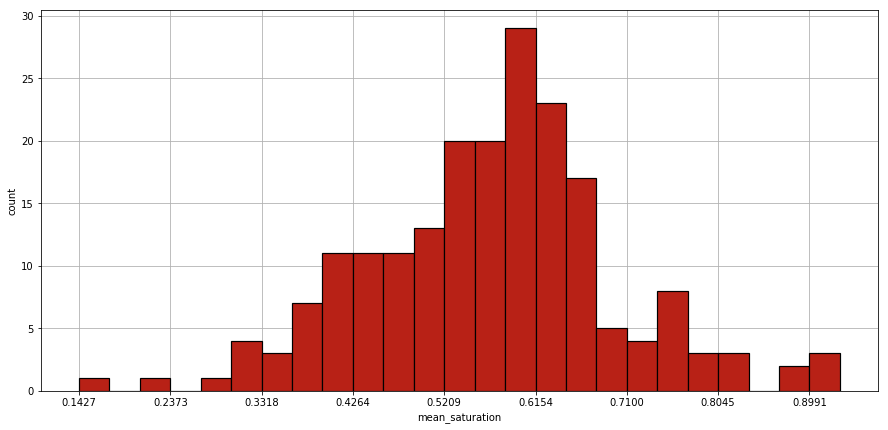

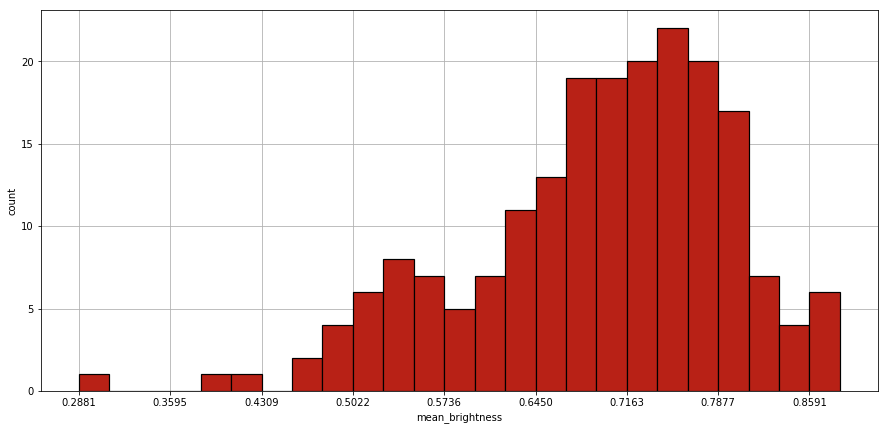

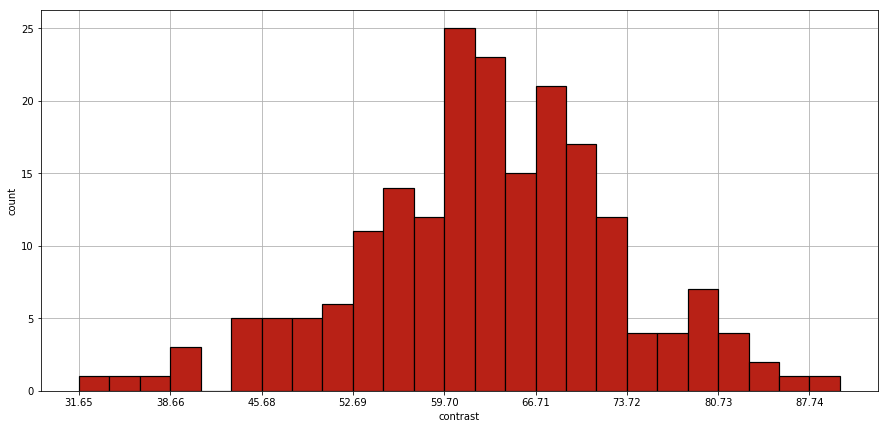

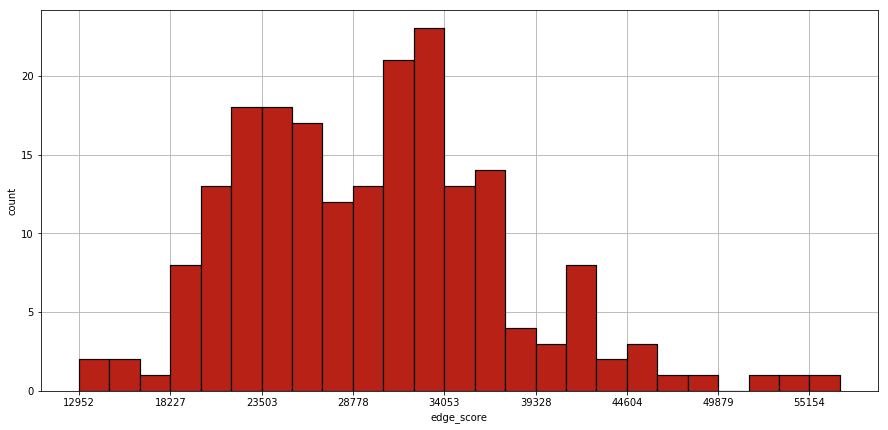

In [21]:
for col in stat_cols:
    granularity = 25
    figure(figsize=(15, 7))
    data = df[col]
    
    plt.grid(True, zorder=0)
    counts, bins, patches = plt.hist(data,
                                     color="#b82116",
                                     bins=granularity,
                                     linewidth=1.2,
                                     edgecolor="black",
                                     zorder=3)
    plt.xlabel(col)
    plt.ylabel("count")
    plt.xticks(bins[::3])
    plt.show()